## Question 1: Run ndvi serially on CPUs, averaging runtimes across 100 simulations. At first, the inputs to ndvi are one dimension. 


In [1]:
!pip3 install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 28.8 MB/s eta 0:00:00


In [1]:
# Import required libraries
import rasterio
import numpy as np
import time

# Import bands as separate images; in /project2/macs30113 on Midway2
band4 = rasterio.open(
      '/content/drive/MyDrive/Colab Notebooks/Landsat data/LC08_B4.tif') #red
band5 = rasterio.open(
      '/content/drive/MyDrive/Colab Notebooks/Landsat data/LC08_B5.tif') #nir

# Convert nir and red objects to float64 arrays
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

In [5]:
red[:10, :]

array([[ 7479.,  7474.,  7472., ...,  8970.,  9186.,  9849.],
       [ 7482.,  7488.,  7477., ...,  9048.,  9151.,  9667.],
       [ 7497.,  7468.,  7454., ...,  9115.,  9150., 10156.],
       ...,
       [ 7500.,  7496.,  7511., ..., 13162., 12995., 13356.],
       [ 7488.,  7475.,  7479., ..., 13946., 14249., 14327.],
       [ 7471.,  7470.,  7462., ..., 13645., 13856., 13879.]])

In [ ]:
#simulate a 100 runs of the code below, and produce a vector of runtimes
runtimes = []
for i in range(100): 
  start_loop = time.perf_counter()
  # NDVI calculation
  ndvi = (nir - red) / (nir + red)
  end_loop = time.perf_counter()
  runtimes.append(end_loop - start_loop)
  

print(np.mean(runtimes))



0.027999482270010957


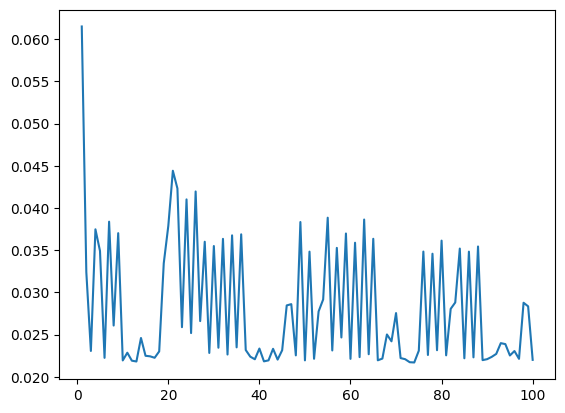

In [ ]:
import matplotlib.pyplot as plt

runs = np.arange(1, 101)
plt.plot(runs, runtimes)

#### Serial CPU Run on Larger Datasets



In [4]:
import numpy as np 
#simulate a 100 runs of the code below, and produce a vector of runtimes
def cpu_runs(x, y): 
  runtimes = []
  for i in range(50): 
    start_loop = time.perf_counter()
    # NDVI calculation
    ndvi = (y - x) / (y + x)
    end_loop = time.perf_counter()
    del ndvi
    runtimes.append(end_loop - start_loop)
  return runtimes

Data is increased 50x

In [7]:
red50 = np.tile(red, 50)
nir50 = np.tile(nir, 50)
runtime50 = cpu_runs(red50, nir50)

In [30]:
print(runtime50)

[1.2350024330000906, 1.2158330659999592, 1.2151687049999964, 1.2211653760000445, 1.11420279999993, 1.1154530710000472, 1.0997530189999907, 1.1068794590000834, 1.1268020759998763, 1.1279015800000707, 1.1309123309999904, 1.1262349679998351, 1.1588726469999528, 1.1818804080000973, 1.2187690559999282, 1.2140343780001785, 1.092788359999986, 1.085346393000009, 1.0796394930000588, 1.0802500689999306, 1.097169417000032, 1.0848918770000182, 1.0888950559999557, 1.0854839009998614, 1.0886295999998765, 1.193874828999924, 1.2140694790000452, 1.2165649329999724, 1.1504984620000869, 1.1147389139998722, 1.0957047059998786, 1.1127422029999252, 1.1199678779998976, 1.129139455999848, 1.1604174879998936, 1.1198564449998685, 1.0987414169999283, 1.2197862470000018, 1.2090362449998793, 1.219016437000164, 1.1825648540000202, 1.0813404000000446, 1.101422113000126, 1.096085351000056, 1.0770932159998665, 1.0933962090000477, 1.085462674999917, 1.09965911900008, 1.0986651460000303, 1.1643220339999516, 1.2185178889

Data is increased 100x

In [8]:
#red100 = np.tile(red, 100)
#nir100 = np.tile(nir, 100)
runtime100 = cpu_runs(red100, nir100)
print(runtime100)

[2.4374635249998846, 2.4525383059999513, 2.2037319349999507, 2.1645671789999597, 2.164266891999887, 2.2146373660000336, 2.330418550000104, 2.4404935939999177, 2.256643522000104, 2.20219724399999, 2.1764483209999526, 2.177270571000008, 2.2427985209999406, 2.4159949889999552, 2.309872486000131, 2.1748009619998356, 2.1892468969999754, 2.148684855000056, 2.1402177309998933, 2.4135375519999798, 2.357213064000007, 2.1769643310001356, 2.287196254000037, 2.6446881070000927, 2.1906220400001075, 2.3811636549999093, 2.30492935999996, 2.206198643999869, 2.29727484, 2.2449884340001063, 2.2891536709998945, 2.440363660999992, 2.346711886999856, 2.2071252809998896, 2.212285983000129, 2.218993775999934, 2.141619708999997, 2.3890549820000615, 2.377016109999886, 2.212945297000033, 2.1941335660001187, 2.217916778000017, 2.1880444070000067, 2.421148570000014, 3.0508095039999716, 2.1809168660001887, 2.194303151999975, 2.1974670409999817, 2.178692503000093, 2.391267505000087, 2.3381495250000626, 2.1655671620

Data is increased 150x

In [3]:
import numpy as np
red150 = np.tile(red, 150)
nir150 = np.tile(nir, 150)

In [2]:
#run the 150 once
import numpy as np
start_loop = time.perf_counter()
for i in range(150): 
  ndvi = (nir - red) / (nir + red)
  end_loop = time.perf_counter()
  del ndvi
runtime = end_loop - start_loop
print(runtime)


3.9555141479995655


In [3]:
#serially obtain the runtime150 vector
import numpy as np
runtime150 = []
for z in range(100):
  start_loop = time.perf_counter()
  for i in range(150):   
    ndvi = (nir - red) / (nir + red)
  end_loop = time.perf_counter()
  del ndvi
  runtime150.append(end_loop - start_loop)
    
  
print(runtime150)


[2.9298757430005935, 2.7483648790002917, 3.112113768999734, 2.747029295000175, 2.9467090190000818, 2.7916572069998438, 2.907223993000116, 3.6827105100001063, 2.8930501909999293, 2.655280310999842, 3.246454674999768, 3.6161941419995856, 4.27950028000032, 3.1999088399998072, 2.893969845000356, 2.989064559000326, 2.949473329999819, 2.8974339919996055, 2.752349200000026, 2.6761246519999986, 2.889604428999519, 2.957592346000638, 2.630048851000538, 2.6465864339998006, 2.7894098779997876, 2.888861573000213, 2.9600468319995343, 2.747111586000756, 2.781530414000372, 2.7948332980004125, 2.939837928000088, 3.0547840090002865, 2.784269537999535, 3.0120392570006516, 3.2636425810005676, 3.679877479999959, 3.090621740999268, 2.9490114279997215, 2.833920040000521, 3.003144180000163, 3.0519119319997117, 2.875930110999434, 2.9714899620003052, 3.0076034740004616, 3.6868146080005317, 2.8339071380005407, 2.8687897999998313, 3.130202131999795, 2.8002651989991136, 2.9878879509997205, 2.9420357930002865, 2.70

Comparing CPU runtimes as the dataset increases in size

In [13]:
runtime100 = [2.4374635249998846, 2.4525383059999513, 2.2037319349999507, 2.1645671789999597, 2.164266891999887, 2.2146373660000336, 2.330418550000104, 2.4404935939999177, 2.256643522000104, 2.20219724399999, 2.1764483209999526, 2.177270571000008, 2.2427985209999406, 2.4159949889999552, 2.309872486000131, 2.1748009619998356, 2.1892468969999754, 2.148684855000056, 2.1402177309998933, 2.4135375519999798, 2.357213064000007, 2.1769643310001356, 2.287196254000037, 2.6446881070000927, 2.1906220400001075, 2.3811636549999093, 2.30492935999996, 2.206198643999869, 2.29727484, 2.2449884340001063, 2.2891536709998945, 2.440363660999992, 2.346711886999856, 2.2071252809998896, 2.212285983000129, 2.218993775999934, 2.141619708999997, 2.3890549820000615, 2.377016109999886, 2.212945297000033, 2.1941335660001187, 2.217916778000017, 2.1880444070000067, 2.421148570000014, 3.0508095039999716, 2.1809168660001887, 2.194303151999975, 2.1974670409999817, 2.178692503000093, 2.391267505000087, 2.3381495250000626, 2.165567162000116, 2.1588724060000004, 2.1754969799999344, 2.1723474340001303, 2.364370044999987, 2.3955329310001616, 2.175280753000152, 2.179743040999938, 2.187876336000045, 2.1914777880001566, 2.342222415999913, 2.4241587049998543, 2.1791047859999253, 2.157926803999999, 2.202139637000073, 2.1969703889999437, 2.315459434999866, 2.4040554729999712, 2.2297287770002185, 2.171472750000021, 2.1513892880000185, 2.167582652999954, 2.2789871200000107, 2.4040278699999362, 2.270936881999887, 2.167022545000009, 2.169668842000192, 2.148063387999855, 2.1910038059997987, 2.4166328209998937, 2.318851703000064, 2.1526590149999265, 2.1752218199999334, 2.1624926479998976, 2.169980384999917, 2.420274079999899, 2.38504571999988, 2.1873803210000915, 2.1757058559999223, 2.165187296999875, 2.160665655999992, 2.4145915039998727, 2.392864065999902, 2.170346317999929, 2.171290583999962, 2.1517153329998564, 2.1507943399999476, 2.2879443159999937, 2.4137897309999516]

In [7]:
runtime50 = [1.2350024330000906, 1.2158330659999592, 1.2151687049999964, 1.2211653760000445, 1.11420279999993, 1.1154530710000472, 1.0997530189999907, 1.1068794590000834, 1.1268020759998763, 1.1279015800000707, 1.1309123309999904, 1.1262349679998351, 1.1588726469999528, 1.1818804080000973, 1.2187690559999282, 1.2140343780001785, 1.092788359999986, 1.085346393000009, 1.0796394930000588, 1.0802500689999306, 1.097169417000032, 1.0848918770000182, 1.0888950559999557, 1.0854839009998614, 1.0886295999998765, 1.193874828999924, 1.2140694790000452, 1.2165649329999724, 1.1504984620000869, 1.1147389139998722, 1.0957047059998786, 1.1127422029999252, 1.1199678779998976, 1.129139455999848, 1.1604174879998936, 1.1198564449998685, 1.0987414169999283, 1.2197862470000018, 1.2090362449998793, 1.219016437000164, 1.1825648540000202, 1.0813404000000446, 1.101422113000126, 1.096085351000056, 1.0770932159998665, 1.0933962090000477, 1.085462674999917, 1.09965911900008, 1.0986651460000303, 1.1643220339999516, 1.2185178889999406, 1.204970970000204, 1.1982448829999157, 1.1126999729999625, 1.0914597699998012, 1.0929352460000246, 1.0858085590000428, 1.0973753309999665, 1.1053910739999537, 1.0813988330000939, 1.100449873000116, 1.1694925780000176, 1.217453826999872, 1.2183213729999807, 1.553407105999895, 1.0916927010000563, 1.0980060100000628, 1.1067459109999618, 1.083496064999963, 1.0985410480000155, 1.1005204479999975, 1.1021453439998368, 1.3435951550000027, 1.505336859000181, 1.2298299199999292, 1.2432615170000645, 1.152542861000029, 1.082018779000009, 1.0850584489999164, 1.0883190249999188, 1.0886424610000631, 1.0902866909998465, 1.0870439600000736, 1.0797536049999508, 1.0951106420000087, 1.1819789819999187, 1.2420603020000271, 1.2027943089999553, 1.2072651099999803, 1.0932377550000183, 1.0973319150000407, 1.0945024699999522, 1.096702710000045, 1.0931968270001562, 1.0821191529998941, 1.110728730000119, 1.0924484879999454, 1.147281489000079, 1.1906892099998458, 1.2187364579999667]

In [11]:
runtime150 = [2.9298757430005935, 2.7483648790002917, 3.112113768999734, 2.747029295000175, 2.9467090190000818, 2.7916572069998438, 2.907223993000116, 3.6827105100001063, 2.8930501909999293, 2.655280310999842, 3.246454674999768, 3.6161941419995856, 4.27950028000032, 3.1999088399998072, 2.893969845000356, 2.989064559000326, 2.949473329999819, 2.8974339919996055, 2.752349200000026, 2.6761246519999986, 2.889604428999519, 2.957592346000638, 2.630048851000538, 2.6465864339998006, 2.7894098779997876, 2.888861573000213, 2.9600468319995343, 2.747111586000756, 2.781530414000372, 2.7948332980004125, 2.939837928000088, 3.0547840090002865, 2.784269537999535, 3.0120392570006516, 3.2636425810005676, 3.679877479999959, 3.090621740999268, 2.9490114279997215, 2.833920040000521, 3.003144180000163, 3.0519119319997117, 2.875930110999434, 2.9714899620003052, 3.0076034740004616, 3.6868146080005317, 2.8339071380005407, 2.8687897999998313, 3.130202131999795, 2.8002651989991136, 2.9878879509997205, 2.9420357930002865, 2.705917086000227, 2.835745495000083, 3.006310052999652, 3.850809484999445, 2.928899601000012, 2.8865528400001494, 2.8223240440001973, 3.7526588939999783, 3.6398748399997203, 2.8068435650002357, 2.813795162000133, 2.9815265900006125, 3.118306157999541, 2.961480897999536, 2.993766983999194, 2.813757259999875, 3.9956294969997543, 2.9310493739994854, 2.849815698999919, 2.7247236989996964, 2.6087648559996524, 3.015030073000162, 2.9218187129999933, 2.7392998340001213, 2.6484263069996814, 2.769372941000256, 2.882680775999688, 2.892816446999859, 2.6984764109993193, 2.6515921110003546, 2.68394011700002, 4.801006991999202, 4.497748940999372, 3.8297900969992043, 2.7552451949995884, 3.049699327999406, 3.0058052390004377, 2.8402426319998995, 2.8512136389999796, 2.690694932999577, 2.989152541999829, 2.85343408099925, 2.7632742300002064, 2.6021132019996003, 3.048363172999416, 3.0924248920000537, 2.8210194319999573, 2.6147636100004092, 3.079100644999926]

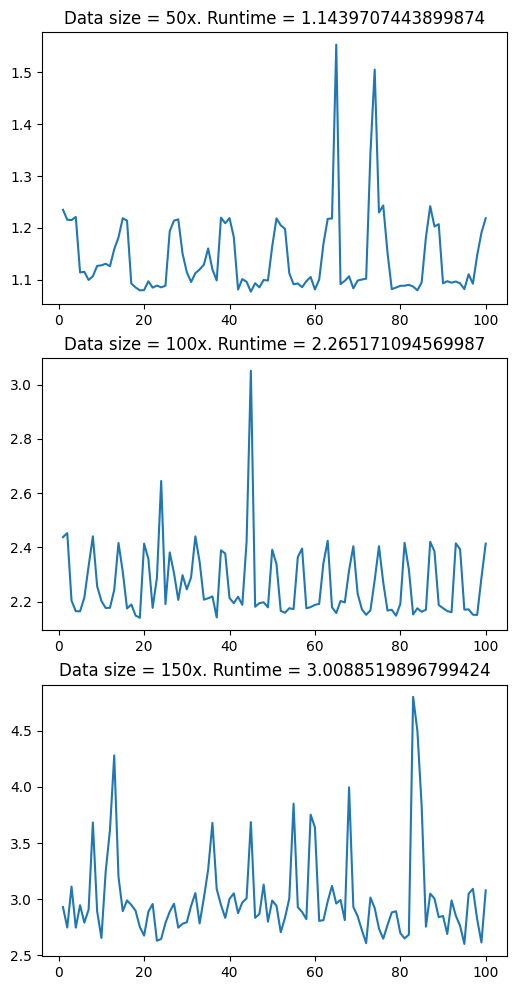

In [14]:
runs = np.arange(1, 101)

import matplotlib.pyplot as plt 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(6, 12))
ax1.plot(runs, runtime50) 
ax1.set_title(f"Data size = 50x. Runtime = {np.mean(runtime50)}")
ax2.plot(runs, runtime100) 
ax2.set_title(f"Data size = 100x. Runtime = {np.mean(runtime100)}")
ax3.plot(runs, runtime150) 
ax3.set_title(f"Data size = 150x. Runtime = {np.mean(runtime150)}")

plt.show()
